In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ccdata/CC GENERAL.csv


In [ ]:
df=pd.read_csv("/kaggle/input/ccdata/CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
#cols=df.drop(df.CUST_ID).columns# .select_dtypes(include=['int64'])
df=df.drop(columns=["CUST_ID"] )
import matplotlib.pyplot as plt
import seaborn as sns
#cols=cols.columns

KeyError: "['CUST_ID'] not found in axis"

In [ ]:
co=df.columns

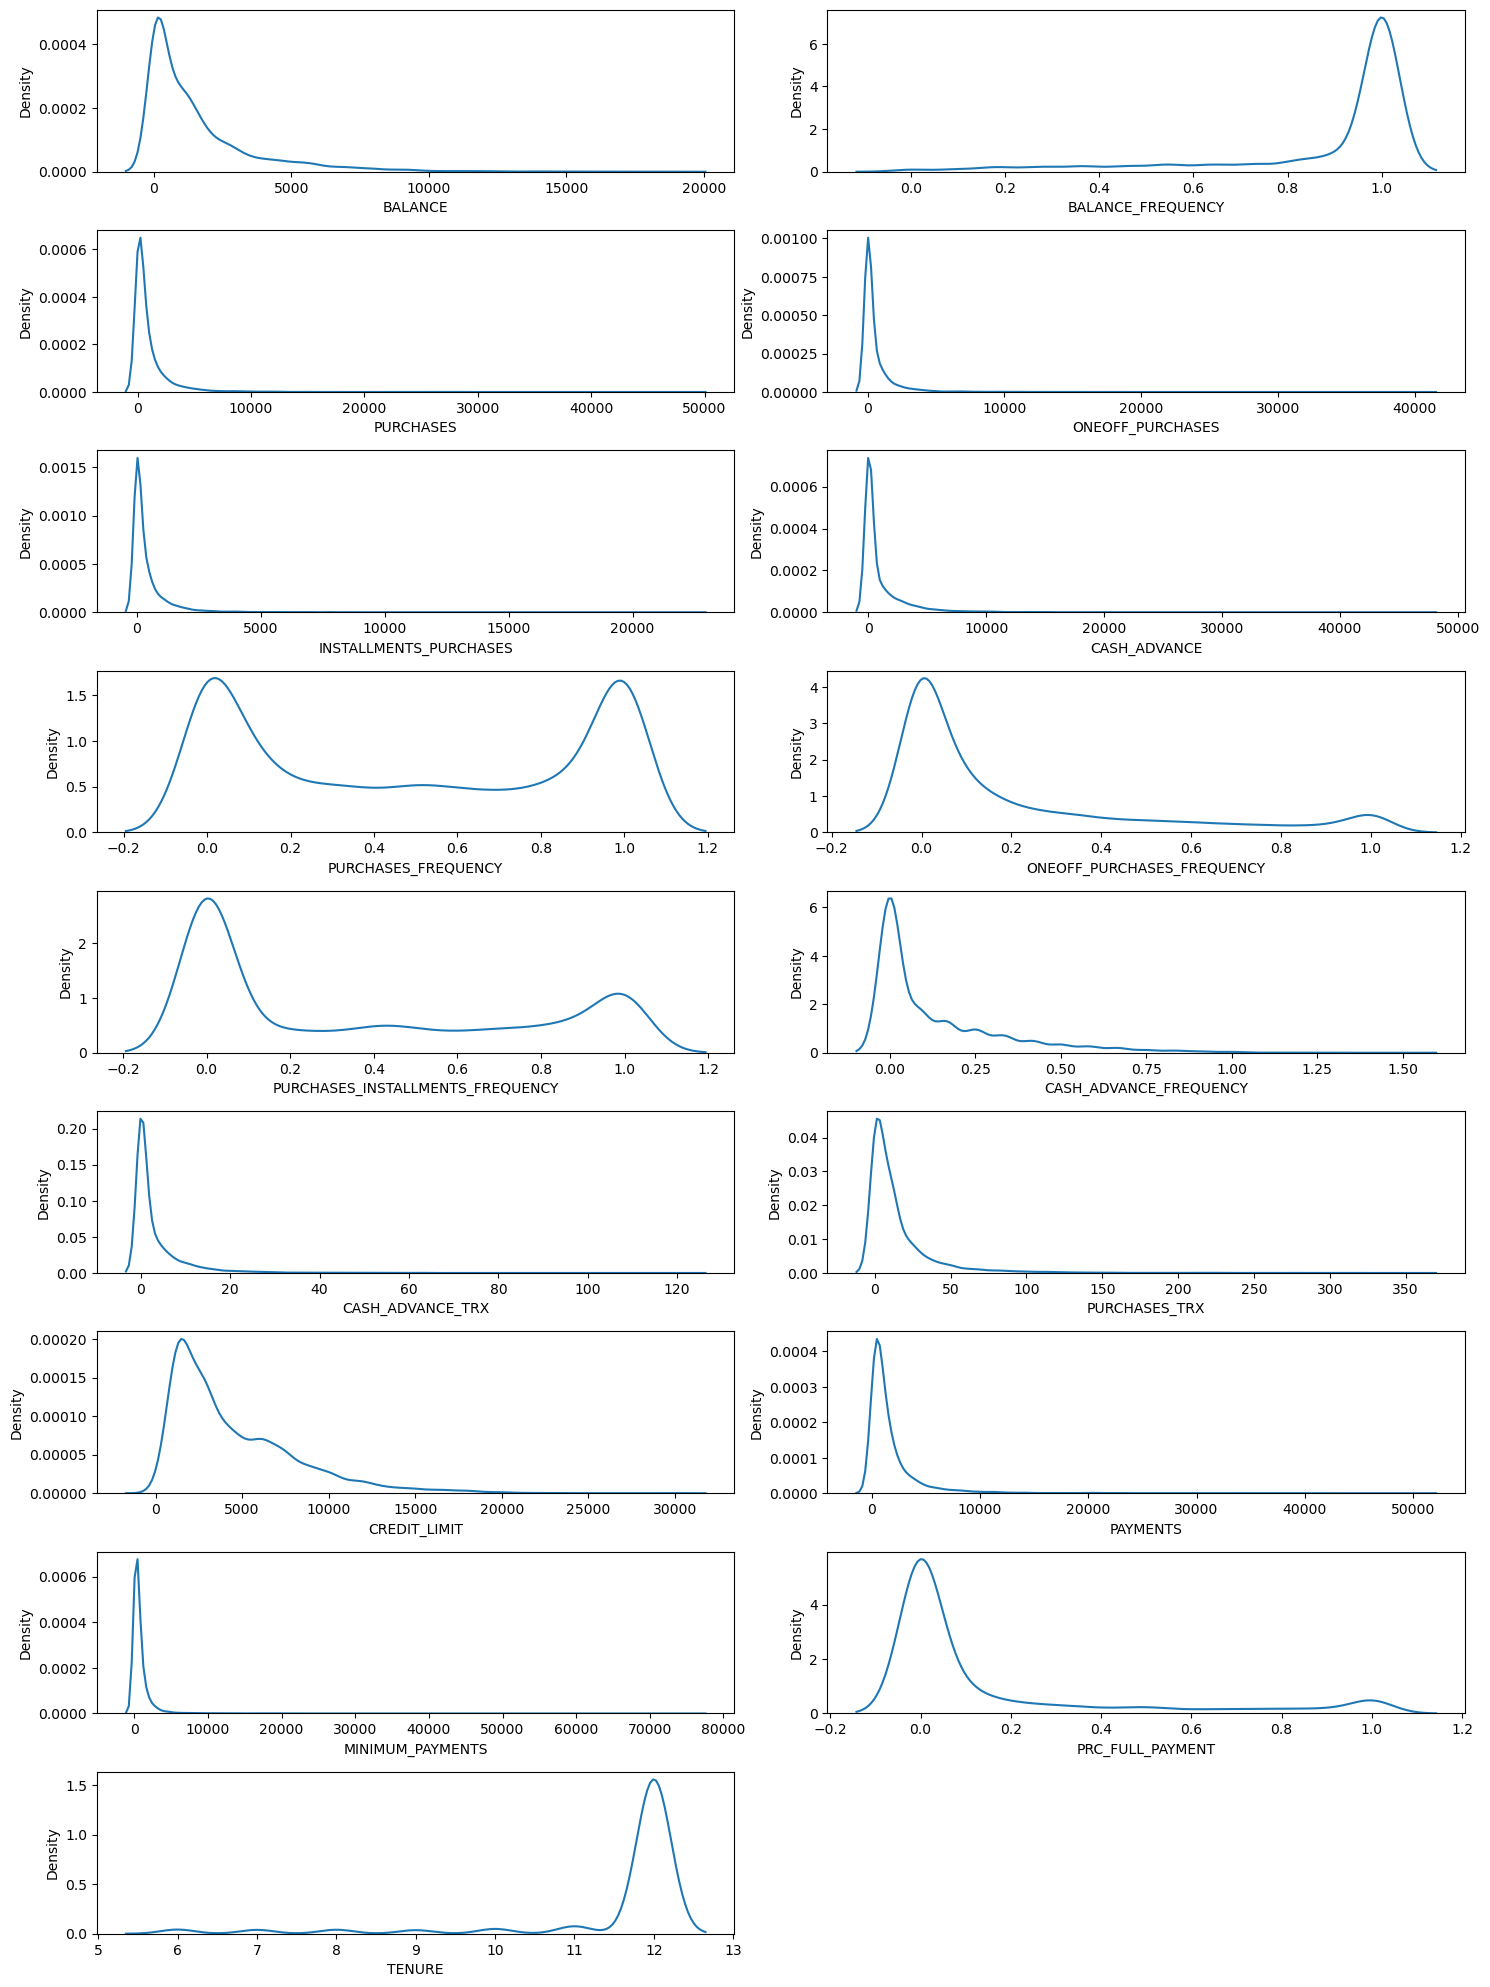

In [ ]:
#skewenss
plt.figure(figsize=(15,20))
for i, col in enumerate(co):
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(df[col], ax=ax)
    #plt.title(col)
    plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
print(scaler.fit_transform(df))
df_transform=scaler.fit_transform(df)
df_tranformed_df=pd.DataFrame(df_transform,columns=df.columns)

[[-0.73198937 -0.24943448 -0.42489974 ... -0.3024     -0.52555097
   0.36067954]
 [ 0.78696085  0.13432467 -0.46955188 ...  0.09749953  0.2342269
   0.36067954]
 [ 0.44713513  0.51808382 -0.10766823 ... -0.0932934  -0.52555097
   0.36067954]
 ...
 [-0.7403981  -0.18547673 -0.40196519 ... -0.32687479  0.32919999
  -4.12276757]
 [-0.74517423 -0.18547673 -0.46955188 ... -0.33830497  0.32919999
  -4.12276757]
 [-0.57257511 -0.88903307  0.04214581 ... -0.3243581  -0.52555097
  -4.12276757]]


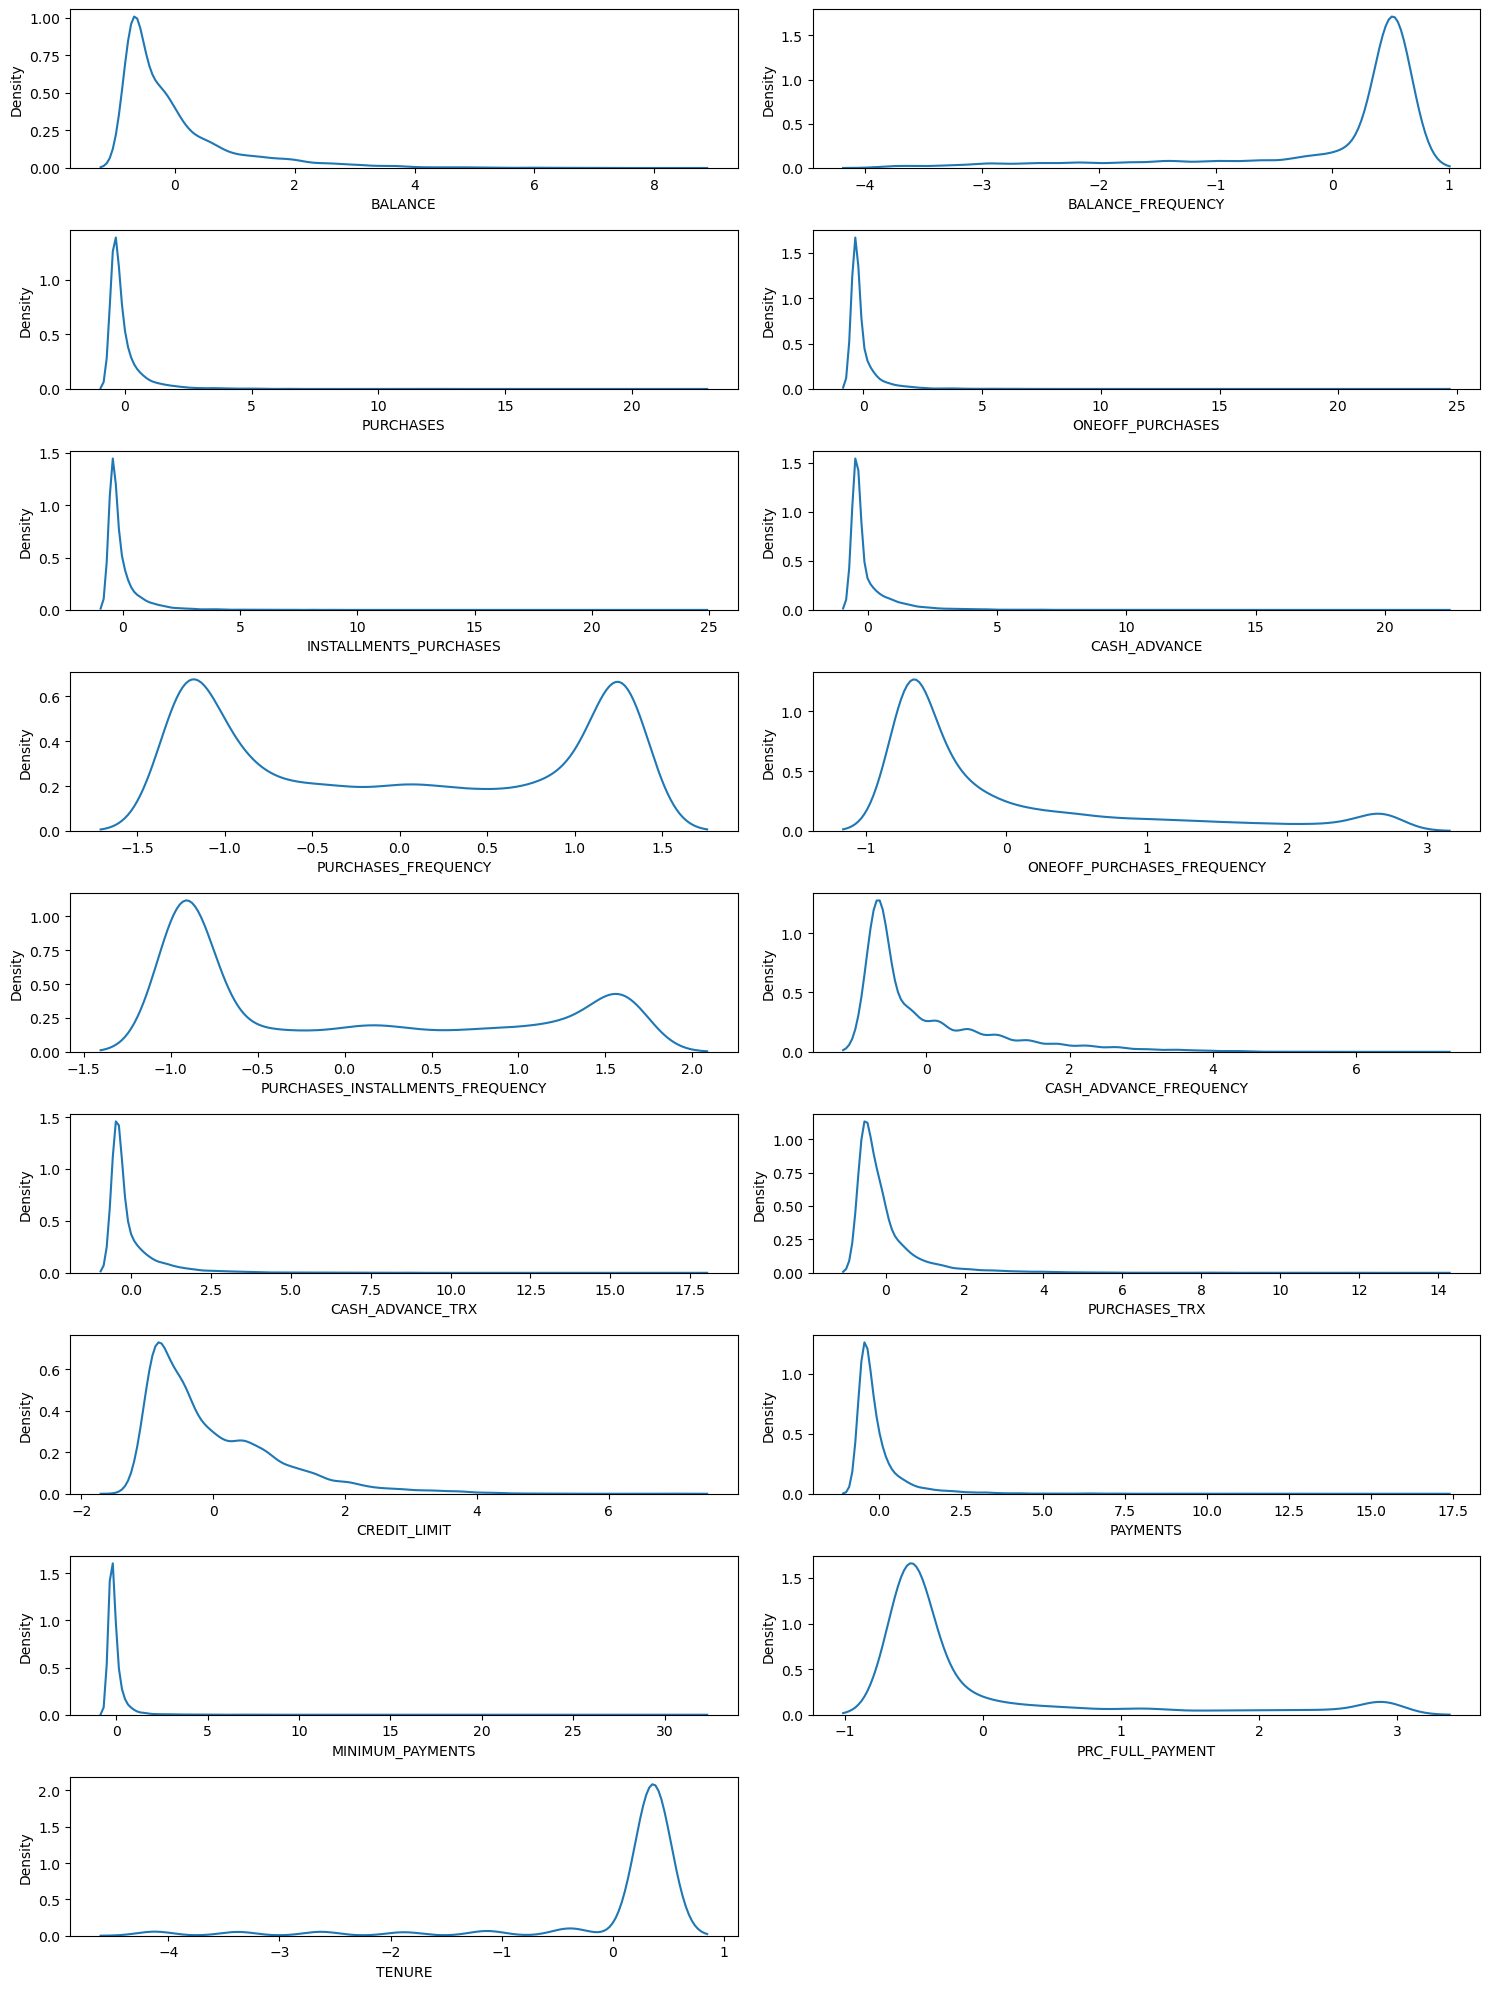

In [ ]:
df_tranformed_df
#skewenss
plt.figure(figsize=(15,20))
for i, col in enumerate(co):
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(df_tranformed_df[col], ax=ax)
    #plt.title(col)
    plt.tight_layout()
plt.show()

In [ ]:
df_tranformed_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960380,-0.528979,-0.305482,-0.525551,0.360680
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688601,0.818642,0.087735,0.234227,0.360680
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826016,-0.383805,-0.099870,-0.525551,0.360680
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826016,-0.598688,NaN,-0.525551,0.360680
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905414,-0.364368,-0.261102,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960380,-0.486217,-0.343682,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960380,-0.503396,NaN,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960380,-0.570615,-0.329547,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097795,-0.580536,-0.340786,0.329200,-4.122768


In [ ]:
# df[CREDIT_LIMIT].drop(axis=0)                        1
df.dropna(axis=1,inplace=True)
#test
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
df.isnull().sum()
df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].median(),inplace=True)
#test
df["MINIMUM_PAYMENTS"].isnull().sum()
df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].median(),inplace=True)

0

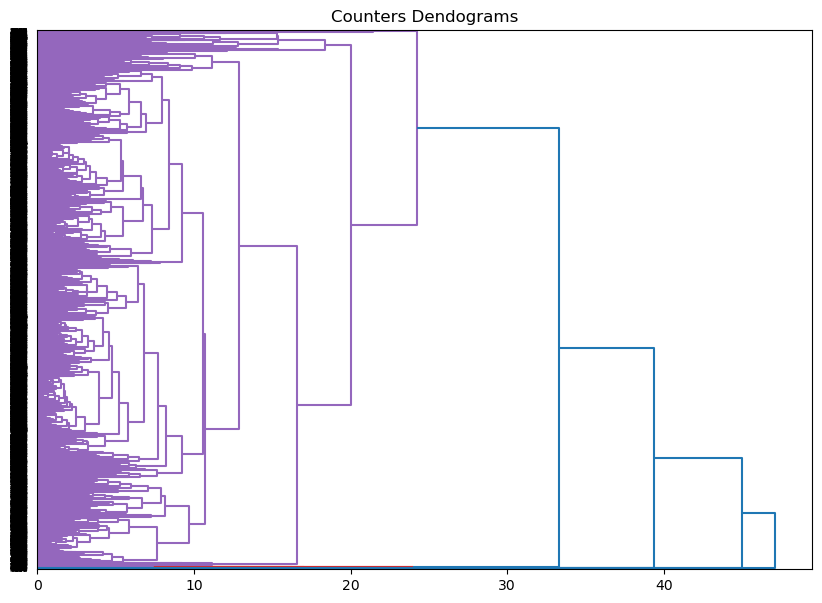

In [ ]:
import scipy.cluster.hierarchy as shc
 
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_transform , method="complete",metric="euclidean"),orientation='right') 
#fill y with your dataframe
#and method with linkage criteria


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

hierarchical_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(df_transform)

print(f'Silhouette Score(n=3): {silhouette_score(df_transform, labels)}')

Silhouette Score(n=3): 0.16731062376211606


In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=2, random_state=42).fit(df_transform)

#gm=gm.predict(df_transform)
gm=gm.fit_predict(df_transform)

print(f'Silhouette Score(n=2): {silhouette_score(df_transform, gm)}')

Silhouette Score(n=2): 0.19165237233266713


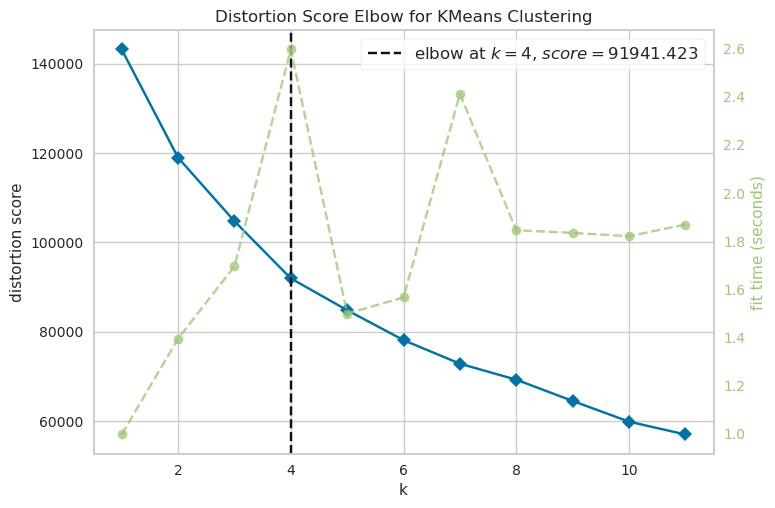

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

kmeanModel = KMeans()
visualizer = KElbowVisualizer(kmeanModel, k = (1,12))

visualizer.fit(df_transform)
visualizer.show()

In [ ]:
km = KMeans(4)
km=km.fit(df_transform)
label=km.fit_predict(df_transform)
print(f'Silhouette Score(n=2): {silhouette_score(df_transform, label)}')

Silhouette Score(n=2): 0.21241079370397029


In [ ]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=3, min_samples=2).fit(df_transform)
clustering = clustering.labels_
print(f'Silhouette Score(n=2): {silhouette_score(df_transform, clustering)}')


Silhouette Score(n=2): 0.3878405329138946


In [ ]:
from sklearn.decomposition import PCA
pca2 = PCA()
pca2.fit(df_transform)
for i in range (df.shape[1]+1):
    pcomps = pca2.transform(df_transform)
    pcomps = pd.DataFrame(pcomps[:,:i+1])
    hac1 =AgglomerativeClustering(affinity='euclidean',linkage='complete',n_clusters=5).fit(pcomps)
    km1 = KMeans(4)
    gm1 = GaussianMixture(2)
    db1=DBSCAN(eps=3, min_samples=2)
    km1.fit(pcomps)
    gm1.fit(pcomps)
    db1.fit(pcomps)
    km = km1.labels_
    gm = gm1.predict(pcomps)
    db = db1.labels_
    hac = hac1.labels_
    print(f"------------------------PCA {i+1}---------------------------------------")
    print("Hierarchical Agglomeretive score: ",silhouette_score(df, hac))
    print("Hierarchical Agglomeretive score: ",silhouette_score(pcomps, hac))
    print("Km score: ",silhouette_score(pcomps, km))
    print("GMM score: ",silhouette_score(pcomps, gm))


------------------------PCA 1---------------------------------------
Hierarchical Agglomeretive score:  0.31332898908392964
Hierarchical Agglomeretive score:  0.5971859331227305
Km score:  0.6108992393946364
GMM score:  0.642495618519511
------------------------PCA 2---------------------------------------
Hierarchical Agglomeretive score:  0.7116820887129908
Hierarchical Agglomeretive score:  0.6317120409515744
Km score:  0.4092380884848088
GMM score:  0.3802289716257656
------------------------PCA 3---------------------------------------
Hierarchical Agglomeretive score:  0.6759754709369821
Hierarchical Agglomeretive score:  0.615649801246732
Km score:  0.37216121868617213
GMM score:  0.37555620946363566
------------------------PCA 4---------------------------------------
Hierarchical Agglomeretive score:  0.8393384055481308
Hierarchical Agglomeretive score:  0.7300083443905294
Km score:  0.32883034438565956
GMM score:  0.2727926212136665
------------------------PCA 5-----------------

In [ ]:
from sklearn.decomposition import PCA
# pca = PCA(n_components=3)
# principalComponents = pca.fit_transform(df)
# principalDf = pd.DataFrame(data = principalComponents)

# principalDf

In [ ]:
from sklearn.decomposition import PCA
pca=PCA().fit(df_transform)
pcaDF = pd.DataFrame({"expl_var" : pca.explained_variance_ratio_, "pc": range(df_transform.shape[1]), "cum_var": pca.explained_variance_ratio_.cumsum()})
pcaDF

,expl_var,pc,cum_var
0,2.804004e-01,0,0.280400
1,2.046186e-01,1,0.485019
2,9.309748e-02,2,0.578117
3,7.880226e-02,3,0.656919
4,6.599867e-02,4,0.722917
5,5.920208e-02,5,0.782120
6,4.747064e-02,6,0.829590
7,4.092658e-02,7,0.870517
8,3.406417e-02,8,0.904581
9,2.813720e-02,9,0.932718
